In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

from warnings import simplefilter  # import warnings filter
pd.options.mode.chained_assignment = None  #hide any pandas warnings
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings
np.random.seed(123) #ensure reproducibility

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Column Description [Link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv)  
id: ID number  
diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)  
radius_mean: mean of distances from center to points on the perimeter  
texture_mean: standard deviation of gray-scale values  
perimeter_mean: mean size of the core tumor  
area_mean  
smoothness_mean: mean of local variation in radius lengths  
compactness_mean: mean of perimeter^2 / area - 1.0  
concavity_mean: mean of severity of concave portions of the contour  
concave points_mean: mean for number of concave portions of the contour  
symmetry_mean  
fractal_dimension_mean: mean for "coastline approximation" - 1  
radius_se: standard error for the mean of distances from center to points on the perimeter  
texture_se: standard error for standard deviation of gray-scale values  
perimeter_se  
area_se  
smoothness_se: standard error for local variation in radius lengths  
compactness_se: standard error for perimeter^2 / area - 1.0  
concavity_se: standard error for severity of concave portions of the contour  
concave points_se: standard error for number of concave portions of the contour  
symmetry_se  
fractal_dimension_se: standard error for "coastline approximation" - 1  
radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter  
texture_worst: "worst" or largest mean value for standard deviation of gray-scale values  
perimeter_worst  
area_worst  
smoothness_worst: "worst" or largest mean value for local variation in radius lengths  
compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0  
concavity_worst: "worst" or largest mean value for severity of concave portions of the contour  
concave points_worst: "worst" or largest mean value for number of concave portions of the contour  
symmetry_worst  
fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1  

In [4]:
# rearrange columns; remove columns of standard error and Unnamed: 32
data_columns = [df.columns[0]]+list(df.columns[2:-1])
data_columns = [c for c in data_columns if not c.endswith('_se')]
df_data = df[data_columns]
df_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Automated feature engineering

In [5]:
# featuretools for automated feature engineering
import featuretools as ft

In [6]:
# Create new entityset
es = ft.EntitySet(id = 'breastcancer')

# Create an entity from the breast cancer dataframe
es = es.entity_from_dataframe(entity_id = 'breastcancer', dataframe = df_data,index = 'id')

In [7]:
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'breastcancer',
                                      trans_primitives = ['multiply_numeric'])

In [8]:
feature_matrix.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst * compactness_worst,area_mean * concavity_mean,perimeter_mean * symmetry_worst,compactness_mean * concavity_worst,area_worst * texture_worst,area_worst * radius_worst,concave points_mean * symmetry_worst,fractal_dimension_worst * perimeter_worst,concavity_mean * smoothness_mean,concave points_mean * fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8670,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,276.74640,109.788740,28.852290,0.046364,30056.000,22264.560,0.022943,10.015731,0.016009,0.006485
8913,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,66.18190,11.659340,18.908401,0.004423,8966.580,7858.740,0.002704,6.043710,0.001572,0.000810
8915,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,245.36940,40.825620,28.740286,0.017721,21208.662,13159.250,0.014274,9.242952,0.005341,0.004083
9047,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,113.74022,16.730496,27.424446,0.015993,13372.318,8051.274,0.007880,7.026315,0.003256,0.001872
85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,316.36604,65.541960,33.532200,0.061624,21225.230,11899.798,0.028626,12.120120,0.014197,0.008654


### Remove Highly Correlated Columns
Drop Highly Correlated Features, the code is adapted from [work](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/) by Chris Albon.

In [9]:
# Define the threshold for removing correlated variables
threshold = 0.9

In [10]:
# Get correlation of each variables
corr_matrix = feature_matrix.corr().abs()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst * compactness_worst,area_mean * concavity_mean,perimeter_mean * symmetry_worst,compactness_mean * concavity_worst,area_worst * texture_worst,area_worst * radius_worst,concave points_mean * symmetry_worst,fractal_dimension_worst * perimeter_worst,concavity_mean * smoothness_mean,concave points_mean * fractal_dimension_worst
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.778111,0.823252,0.786999,0.485344,0.857731,0.893360,0.717964,0.743352,0.634757,0.690162
texture_mean,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.353897,0.298299,0.294014,0.280485,0.542475,0.324919,0.273476,0.347966,0.267968,0.291705
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.802950,0.847643,0.804136,0.531579,0.859840,0.894681,0.750804,0.771754,0.676180,0.727898
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.790598,0.870053,0.764257,0.479740,0.875674,0.932739,0.708885,0.731129,0.645467,0.683391
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.362794,0.385629,0.365964,0.500740,0.185407,0.202357,0.571878,0.440187,0.602458,0.603005


In [11]:
# Select columns with correlations above threshold
col_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('Columns with correlation > {}:\n-{}'.format(threshold,"\n-".join(col_to_drop)))

Columns with correlation > 0.9:
-perimeter_mean
-area_mean
-concave points_mean
-radius_worst
-texture_worst
-perimeter_worst
-area_worst
-concave points_worst
-concave points_worst * texture_mean
-concave points_worst * fractal_dimension_mean
-fractal_dimension_mean * fractal_dimension_worst
-compactness_worst * smoothness_worst
-concave points_mean * radius_worst
-concave points_mean * smoothness_mean
-smoothness_mean * smoothness_worst
-fractal_dimension_mean * symmetry_worst
-concave points_worst * texture_worst
-concavity_mean * symmetry_worst
-compactness_worst * fractal_dimension_worst
-concavity_mean * radius_mean
-perimeter_worst * radius_worst
-concave points_mean * concavity_mean
-fractal_dimension_worst * texture_mean
-compactness_mean * compactness_worst
-area_mean * compactness_worst
-fractal_dimension_worst * smoothness_mean
-radius_mean * symmetry_mean
-area_worst * radius_mean
-area_worst * compactness_mean
-concavity_worst * texture_mean
-concavity_worst * fractal_dim

In [12]:
feature_matrix_dropcorr = feature_matrix.drop(columns = col_to_drop)
feature_matrix_dropcorr.shape

(569, 22)

In [13]:
# Remove columns with missing values
feature_matrix_dropcorr.replace([np.inf, -np.inf], np.nan, inplace=True)
col_without_nan = feature_matrix_dropcorr.columns[~feature_matrix_dropcorr.isna().any()]
feature_matrix_dropcorr_dropnan = feature_matrix_dropcorr[col_without_nan]
feature_matrix_dropcorr_dropnan.shape

(569, 22)

In [14]:
from featuretools import selection
selection.remove_low_information_features(feature_matrix_dropcorr_dropnan)
feature_matrix_dropcorr_dropnan.shape

(569, 22)

In [15]:
# Remove columns with too little information (less than ten distinct values)
col_with_dist_val = []
for col in feature_matrix_dropcorr_dropnan:
    if len(set(feature_matrix_dropcorr_dropnan[col].tolist()))>10:
        col_with_dist_val.append(col)
feature_matrix_dropcorr_dropnan_dropmonoval = feature_matrix_dropcorr_dropnan[col_with_dist_val]
feature_matrix_dropcorr_dropnan_dropmonoval.shape

(569, 22)

In [16]:
feature_matrix_dropcorr_dropnan_dropmonoval.to_csv('test.csv')

In [17]:
# Convert (M=malignant, B=benign) to (1,0)

def convert_to_num(diag):
    return 0 if diag =='B' else 1

outcomes = df['diagnosis'].apply(convert_to_num)

## K-fold cross validation

In [18]:
feature_names = feature_matrix_dropcorr.columns.tolist()
X = feature_matrix_dropcorr_dropnan_dropmonoval.values
y = outcomes

In [19]:
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def cross_validatoin(fold, model, X, y):
    
    sensitivity=[]
    specificity=[]
    accuracy=[]
    F1scores=[]
    
    kf = KFold(n_splits=fold,shuffle=True) 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test,y_pred)
        sensitivity.append(cm[0,0]/(cm[0,0]+cm[1,0]))
        specificity.append(cm[1,1]/(cm[1,1]+cm[0,1]))
        accuracy.append(accuracy_score(y_test,y_pred))
        F1scores.append(f1_score(y_test, y_pred, pos_label=1))
        
    return [np.mean(sensitivity),np.mean(specificity),np.mean(accuracy),np.mean(F1scores)]

In [20]:
d_Model_eva = {} # create dictionary to collect results
fold = 10  # n-fold cross validation

### Apply Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
d_Model_eva['Random Forest'] = cross_validatoin(fold, RandomForestClassifier(), X, y)

### Output

In [22]:
df_eva = pd.DataFrame(d_Model_eva, index=['Sensitivity','Specificity','Accuracy','F1-score'])
df_eva.round(3)

,Random Forest
Sensitivity,0.617
Specificity,0.359
Accuracy,0.550
F1-score,0.248


In [23]:
print('{}-fold cross validation shows:'.format(fold))
for index, row in df_eva.iterrows():
    print("- {} score = {:.3f}.".format(df_eva.loc[index,:].idxmax(axis=1),df_eva.loc[index, df_eva.loc[index,:].idxmax(axis=1)]))

10-fold cross validation shows:
- Random Forest score = 0.617.
- Random Forest score = 0.359.
- Random Forest score = 0.550.
- Random Forest score = 0.248.


## Evaluate the impact of each feature with SHAP Values  
Link to [SHAP (SHapley Additive exPlanations)](https://www.kaggle.com/dansbecker/shap-values)

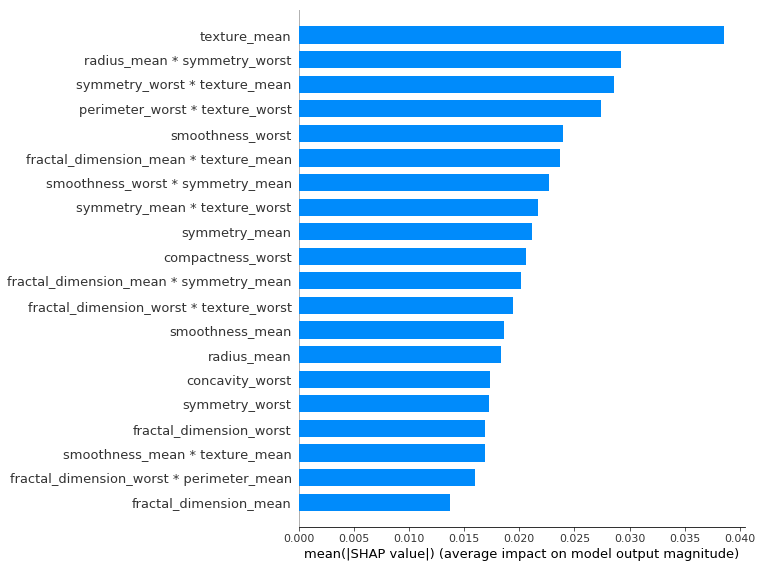

In [24]:
import shap

explainer = shap.TreeExplainer(RandomForestClassifier().fit(X,y)) # Create object that can calculate shap values
shap_values = explainer.shap_values(X) 

shap.summary_plot(shap_values[1], X, feature_names=feature_names,plot_type="bar")

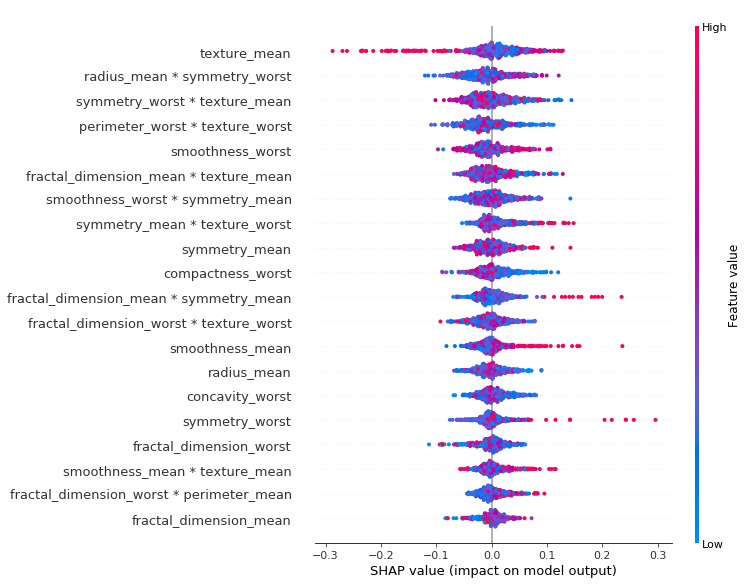

In [25]:
shap.summary_plot(shap_values[1],X,feature_names=feature_names)

In [26]:
# Create dataframe of feature importance according to SHAP
shap_sum = np.abs(shap_values[1]).mean(axis=0)
df_importance = pd.DataFrame([feature_names, shap_sum.tolist()]).T
df_importance.columns = ['Features','SHAP_importance']
df_importance = df_importance.sort_values('SHAP_importance', ascending=False)
df_importance                             

,Features,SHAP_importance
1,texture_mean,0.0385525
16,radius_mean * symmetry_worst,0.0292397
21,symmetry_worst * texture_mean,0.0285466
14,perimeter_worst * texture_worst,0.027404
7,smoothness_worst,0.0239322
15,fractal_dimension_mean * texture_mean,0.0237078
17,smoothness_worst * symmetry_mean,0.0226906
20,symmetry_mean * texture_worst,0.0217405
5,symmetry_mean,0.0211515
8,compactness_worst,0.0206526


### Distribution of the most impactful features

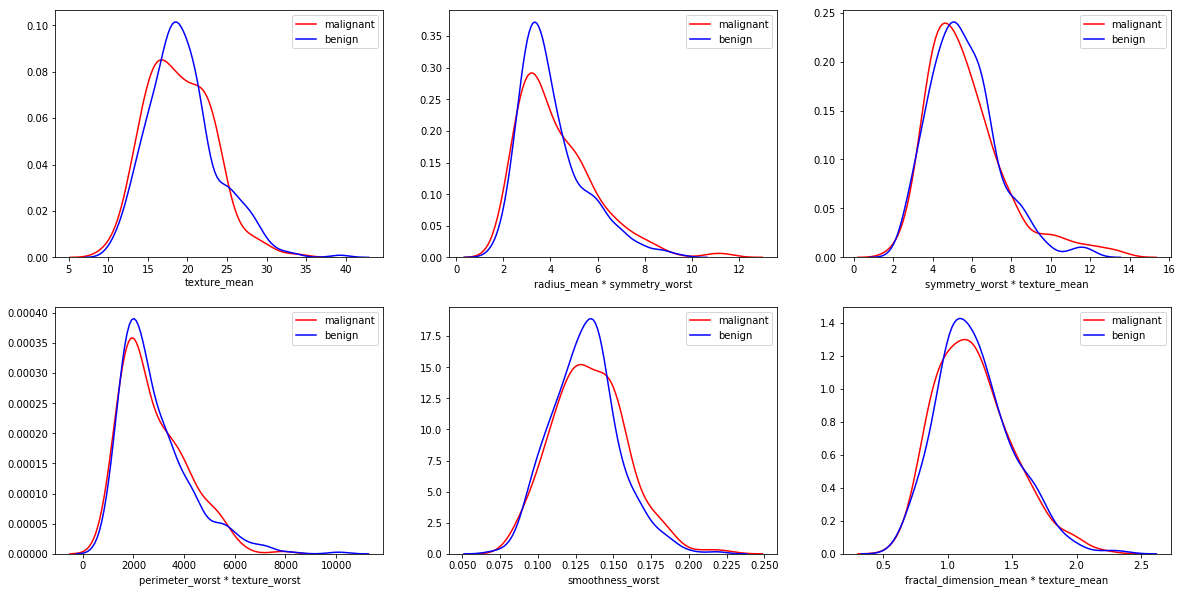

In [27]:
# Plot the distribution of top 6 features
top_features = df_importance.head(6)['Features'].tolist()
feature_matrix_dropcorr_dropnan_dropmonoval['diagnosis'] = df['diagnosis'].tolist()
plt.figure(figsize = (20, 10))
for i, top_feature in enumerate(top_features):
    
    # create a new subplot for each source
    plt.subplot(2, 3, i + 1)

    # KDE plot of the most impactful feature 
    sns.kdeplot(feature_matrix_dropcorr_dropnan_dropmonoval.loc[feature_matrix_dropcorr_dropnan_dropmonoval['diagnosis'] == 'M',top_feature],color='red',label = 'malignant')
    sns.kdeplot(feature_matrix_dropcorr_dropnan_dropmonoval.loc[feature_matrix_dropcorr_dropnan_dropmonoval['diagnosis'] == 'B',top_feature],color='blue', label = 'benign')

    # Labeling of plot
    plt.xlabel(top_feature)


### Distribution of the least impactful features

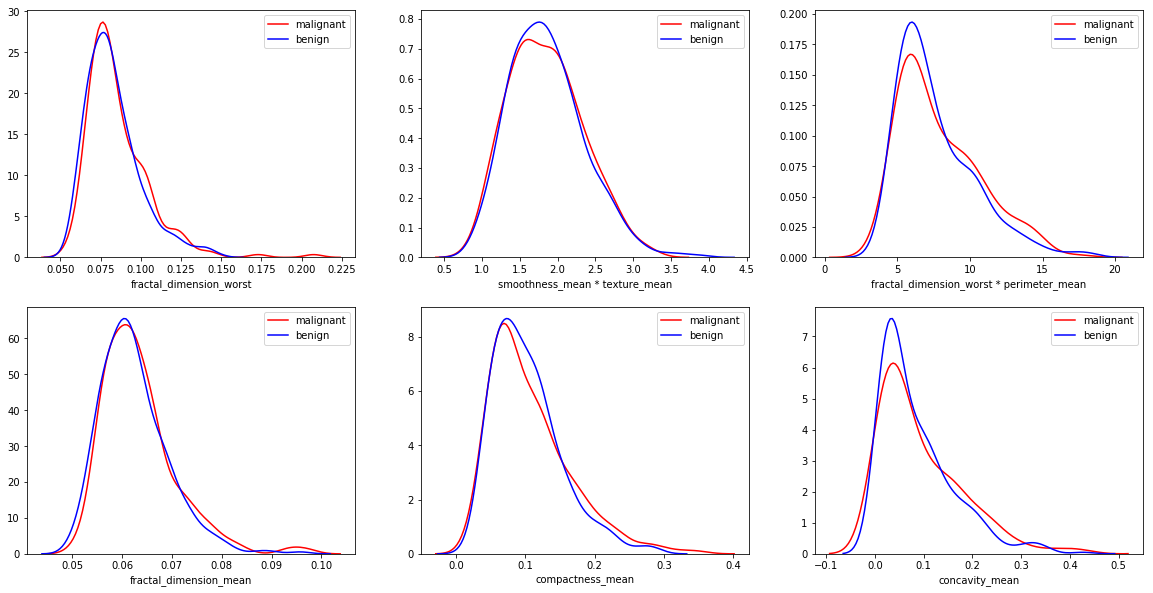

In [28]:
# Plot the distribution of top 6 features
top_features = df_importance.tail(6)['Features'].tolist()
feature_matrix_dropcorr_dropnan_dropmonoval['diagnosis'] = df['diagnosis'].tolist()
plt.figure(figsize = (20, 10))
for i, top_feature in enumerate(top_features):
    
    # create a new subplot for each source
    plt.subplot(2, 3, i + 1)

    # KDE plot of the most impactful feature 
    sns.kdeplot(feature_matrix_dropcorr_dropnan_dropmonoval.loc[feature_matrix_dropcorr_dropnan_dropmonoval['diagnosis'] == 'M',top_feature],color='red',label = 'malignant')
    sns.kdeplot(feature_matrix_dropcorr_dropnan_dropmonoval.loc[feature_matrix_dropcorr_dropnan_dropmonoval['diagnosis'] == 'B',top_feature],color='blue', label = 'benign')

    # Labeling of plot
    plt.xlabel(top_feature)


The results suggested introducing these addition features with featuretools does not improve the performance.

#### Reason 1: overfitting
To test if the model was overfit, I calculated the accuracy of model in predicting training data: